# Training on MNIST dataset for Handwritten Number Recogniton

### Importing Libraries and important stuff

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

### Loading Data and preprocessing it

In [2]:
# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preprocess the data
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1)).astype('float64') / 255
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1)).astype('float64') / 255
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

### Building our Convolutional Neural Network

In [3]:
# Building the model architechture
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compiling the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

c:\Users\shaan\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Training our CNN

In [5]:
model.fit(x_train, y_train, epochs=8, batch_size=32, validation_split=0.2)

Epoch 1/8
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9057 - loss: 0.2995 - val_accuracy: 0.9799 - val_loss: 0.0637
Epoch 2/8
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9849 - loss: 0.0452 - val_accuracy: 0.9882 - val_loss: 0.0406
Epoch 3/8
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9919 - loss: 0.0258 - val_accuracy: 0.9891 - val_loss: 0.0395
Epoch 4/8
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9945 - loss: 0.0163 - val_accuracy: 0.9877 - val_loss: 0.0410
Epoch 5/8
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9957 - loss: 0.0125 - val_accuracy: 0.9881 - val_loss: 0.0465
Epoch 6/8
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9966 - loss: 0.0099 - val_accuracy: 0.9861 - val_loss: 0.0543
Epoch 7/8
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9968 - loss: 0.0087 - val_accuracy: 0.9873 - val_loss: 0.0627
Epoch 8/8
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9981 - loss: 0.0060 - 

### Evaluating the Accuracy of our CNN on a given test dataset

In [6]:
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc}")

313/313 - 1s - 2ms/step - accuracy: 0.9881 - loss: 0.0460
Test accuracy: 0.988099992275238


### Saving the model to a .h5 file


In [17]:
# Save the model
model.save("mnist_cnn_model.h5")

Now we use the tkinter program to draw a number and we input that number to our trained and saved NN (remember the .h5 file?)


Go use that program to draw a number and upload it here!

### Inverting the handwritten number image

The following code snippet will invert the black and white image making it similar to the dataset

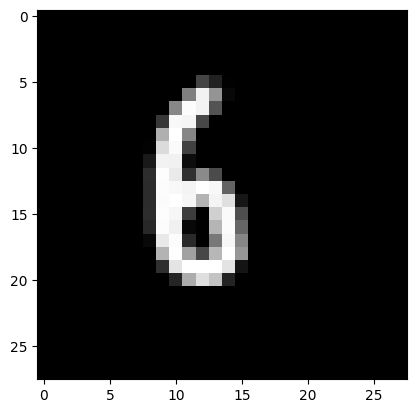

In [8]:
from PIL import Image
import PIL.ImageOps

image = Image.open('drawn_image.png')
inverted_image = PIL.ImageOps.invert(image)
inverted_image.save('drawn_inv_image.png')

image = Image.open('drawn_inv_image.png')
inverted_image = PIL.ImageOps.invert(image)
plt.imshow(inverted_image, cmap="Greys")
plt.show()

### Use the drawing program and upload it

Here's the code for it, run it in your local environment

```
import tkinter as tk
from PIL import Image, ImageDraw

# Create a Tkinter window
class DrawingApp:
    def __init__(self, root):
        self.root = root
        self.root.title("Drawing Canvas")
        
        # Canvas for drawing
        self.canvas = tk.Canvas(root, width=280, height=280, bg='white')
        self.canvas.pack()
        
        # Initialize drawing state
        self.drawing = False
        self.last_x, self.last_y = None, None
        
        # Event bindings
        self.canvas.bind("<ButtonPress-1>", self.start_drawing)
        self.canvas.bind("<B1-Motion>", self.draw)
        self.canvas.bind("<ButtonRelease-1>", self.stop_drawing)
        
        # Button to save the drawing
        save_button = tk.Button(root, text="Save", command=self.save_image)
        save_button.pack()
        
        # Image to save drawing
        self.image = Image.new("L", (280, 280), "white")
        self.draw_instance = ImageDraw.Draw(self.image)
    
    def start_drawing(self, event):
        self.drawing = True
        self.last_x, self.last_y = event.x, event.y
    
    def draw(self, event):
        if self.drawing:
            # Draw on canvas
            self.canvas.create_line(self.last_x, self.last_y, event.x, event.y, fill="black", width=10)
            
            # Draw on PIL image
            self.draw_instance.line([self.last_x, self.last_y, event.x, event.y], fill="black", width=10)
            
            self.last_x, self.last_y = event.x, event.y
    
    def stop_drawing(self, event):
        self.drawing = False
    
    def save_image(self):
        self.image = self.image.resize((28, 28))  # Resize to MNIST dimensions
        self.image.save("drawn_image.png")
        print("Image saved as drawn_image.png")


# Run the application
root = tk.Tk()
app = DrawingApp(root)
root.mainloop()

```



In [9]:
from tensorflow.keras.models import load_model
from PIL import Image  # Import the Image class from Pillow
import numpy as np

# Load the drawn image
img = Image.open("drawn_inv_image.png")

# Preprocess the image
img_array = np.array(img)  # Normalize pixel values to [0, 1]
img_array = img_array.reshape(1, 28, 28, 1)  # Add batch and channel dimensions

# Load the trained model
model = load_model("mnist_cnn_model.h5")

# Predict the digit
prediction = model.predict(tf.convert_to_tensor(img_array, dtype=tf.float64))
print(prediction)
predicted_digit = np.argmax(prediction)  # Get the digit with the highest probability
print("Predicted digit:", predicted_digit)
print(model.summary())

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]
Predicted digit: 6


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 7744)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │       495,680 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 515,148 (1.97 MB)

 Trainable params: 515,146 (1.97 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

None
